<a href="https://colab.research.google.com/github/prjanarthanan/Pandas/blob/master/Introduction_to_Data_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

**Series**

*From ND Array*

In [2]:
s = pd.Series(np.random.randn(5),index=['a','b','c','d','e'])
s

a    0.887244
b   -0.339268
c   -2.614288
d   -0.027449
e   -0.189159
dtype: float64

In [3]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [4]:
pd.Series(np.random.randn(5))

0    0.074924
1   -1.327678
2   -0.278815
3   -1.222500
4    0.588682
dtype: float64

In [5]:
d = {'b': 1, 'a': 0, 'c': 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [6]:
d = {'a': 0., 'b': 1., 'c': 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [7]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

*From scalar value*

In [8]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

*Series is ndarray-like*

In [9]:
s[0]

0.8872443208489615

In [10]:
s[:3]

a    0.887244
b   -0.339268
c   -2.614288
dtype: float64

In [11]:
s[s > s.median()]

a    0.887244
d   -0.027449
dtype: float64

In [12]:
s[[4, 3, 1]]

e   -0.189159
d   -0.027449
b   -0.339268
dtype: float64

In [13]:
np.exp(s)

a    2.428428
b    0.712292
c    0.073220
d    0.972924
e    0.827655
dtype: float64

In [14]:
s.dtype

dtype('float64')

In [15]:
s.array

<PandasArray>
[   0.8872443208489615,  -0.33926796414493043,    -2.614287710059672,
 -0.027448968437777287,  -0.18915932466403773]
Length: 5, dtype: float64

In [16]:
s.to_numpy()

array([ 0.88724432, -0.33926796, -2.61428771, -0.02744897, -0.18915932])

*Series is dict-like*

In [17]:
s['e'] = 12.

In [18]:
s['a']

0.8872443208489615

In [19]:
s

a     0.887244
b    -0.339268
c    -2.614288
d    -0.027449
e    12.000000
dtype: float64

In [20]:
'e' in s

True

In [21]:
'f' in s

False

In [22]:
# s['f']

In [23]:
s.get('f')

In [24]:
s.get('f', np.nan)

nan

**Vectorized operations and label alignment with Series**

In [25]:
s + s

a     1.774489
b    -0.678536
c    -5.228575
d    -0.054898
e    24.000000
dtype: float64

In [26]:
s * 3

a     2.661733
b    -1.017804
c    -7.842863
d    -0.082347
e    36.000000
dtype: float64

In [27]:
np.exp(s)

a         2.428428
b         0.712292
c         0.073220
d         0.972924
e    162754.791419
dtype: float64

In [28]:
s[1:] + s[:-1]

a         NaN
b   -0.678536
c   -5.228575
d   -0.054898
e         NaN
dtype: float64

*Name attribute*

In [29]:
s = pd.Series(np.random.randn(5), name='something')
s

0   -0.556877
1    1.088393
2   -0.973309
3   -1.039063
4    0.082831
Name: something, dtype: float64

In [30]:
s.name

'something'

In [31]:
s2 = s.rename("different")
s2.name

'different'

**DataFrame**

*From dict of Series or dicts*

In [32]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [33]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [34]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [35]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [36]:
df.columns

Index(['one', 'two'], dtype='object')

*From dict of ndarrays / lists*

In [37]:
 d = {'one': [1., 2., 3., 4.],
      'two': [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [38]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


*From structured or record array*

In [39]:
data = np.zeros((2, ), dtype=[('A', 'i4'),
                              ('B', 'f4'), ('C', 'a10')])
data[:] = [(1, 2., 'Hello'), (2, 3., "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [40]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [41]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


*From a list of dicts*

In [42]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2)


,a,b,c
0,1,2,NaN
1,5,10,20.0


In [43]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [44]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


In [45]:
pd.DataFrame(data2,index=['first', 'second'], columns=['a', 'b'])

,a,b
first,1,2
second,5,10


*From a dict of tuples*

In [46]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

*From a list of dataclasses*

In [47]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,0
0,"Point(x=0, y=0)"
1,"Point(x=0, y=3)"
2,"Point(x=2, y=3)"


**Alternate constructors**
*DataFrame.from_dict*

In [48]:
dict([('A', [1, 2, 3]), ('B', [4, 5, 6])])

{'A': [1, 2, 3], 'B': [4, 5, 6]}

In [49]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [50]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]),
                             ('B', [4, 5, 6])]),
                       orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


*DataFrame.from_records*

In [51]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [52]:
pd.DataFrame.from_records(data, index='A')

,B,C
A,,
1,2.0,b'Hello'
2,3.0,b'World'


In [53]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


**Column selection, addition, deletion**

In [54]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [55]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [56]:
del df['two']
three = df.pop('three')
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [57]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [58]:
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [59]:
df.insert(1, 'bar', df['one'])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


**Assigning new columns in method chains**

In [60]:
from sklearn import datasets

In [61]:
iris_ds = datasets.load_iris()

In [62]:
x = iris_ds.data[:]
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [63]:
iris_name = pd.DataFrame(x,columns=['SepalLength','SepalWidth',
                                    'PetalLength','PetalWidth'])

In [64]:
y = iris_ds.target
y[:5]

array([0, 0, 0, 0, 0])

In [65]:
iris_target = pd.DataFrame(y,columns=['Name'])

In [66]:
iris_ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
iris_complete = iris_name
iris_complete['Name'] = iris_target['Name']

iris_complete.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [68]:
iris_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [69]:
iris_complete['Name'] = iris_complete['Name'].astype('category')
iris_complete['Name'].cat.categories = ['Iris-setosa','Iris-versicolor','Iris-virginica'] 
iris_complete.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
iris_complete.to_csv('iris.data',index=False)

In [71]:
iris = pd.read_csv('iris.data')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
(iris.assign(sepal_ratio=iris['SepalWidth'] / iris['SepalLength'])
.head())

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [73]:
iris.assign(sepal_ratio=lambda x: (x['SepalWidth'] / x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [74]:
(iris.query('SepalLength > 5')
.assign(SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength))

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio,PetalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275,0.142857
5,5.4,3.9,1.7,0.4,Iris-setosa,0.722222,0.235294
10,5.4,3.7,1.5,0.2,Iris-setosa,0.685185,0.133333
14,5.8,4.0,1.2,0.2,Iris-setosa,0.689655,0.166667
15,5.7,4.4,1.5,0.4,Iris-setosa,0.771930,0.266667
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0.447761,0.442308
146,6.3,2.5,5.0,1.9,Iris-virginica,0.396825,0.380000
147,6.5,3.0,5.2,2.0,Iris-virginica,0.461538,0.384615
148,6.2,3.4,5.4,2.3,Iris-virginica,0.548387,0.425926


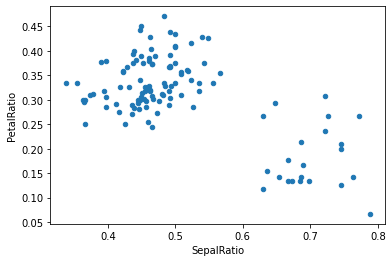

In [75]:
(iris.query('SepalLength > 5')
.assign(SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength).plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

In [76]:
dfa = pd.DataFrame({"A": [1, 2, 3],
                    "B": [4, 5, 6]})
dfa

,A,B
0,1,4
1,2,5
2,3,6


In [77]:
dfa.assign(C=lambda x: x['A'] + x['B'],
           D=lambda x: x['A'] + x['C'])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


**Indexing / selection**

In [78]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [79]:
df.loc['b']

one              2
bar              2
flag         False
foo            bar
one_trunc        2
Name: b, dtype: object

In [80]:
df.iloc[2]

one             3
bar             3
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

In [81]:
df[2:4]

,one,bar,flag,foo,one_trunc
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


**Data alignment and arithmetic**

In [82]:
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.024881,-1.464592,0.042151,-0.362318
1,0.407505,-0.720144,0.990383,-2.226879
2,-1.299667,-0.625441,-0.190454,1.653723
3,-0.421172,-0.184834,-0.473721,1.000714
4,-0.246159,-0.690834,1.275470,-0.841730
5,-0.643731,1.507298,-1.445512,-0.098812
6,0.037502,-0.804951,-1.369746,-0.523422
7,0.762330,0.052932,0.548610,0.324170
8,-0.104933,-0.396813,0.932001,-1.172067
9,-0.632914,0.258805,0.882513,-0.403184


In [83]:
df2 = pd.DataFrame(np.random.randn(7, 3),
                   columns=['A', 'B', 'C'])
df2

,A,B,C
0,0.785874,-0.081396,-0.926299
1,-0.792361,-0.736560,-1.334150
2,-0.947787,0.094457,2.332162
3,1.020337,-0.187744,0.420749
4,-0.204145,0.299735,0.962982
5,0.158237,-0.342744,-0.534574
6,-0.192383,0.398247,1.699927


In [84]:
df + df2

,A,B,C,D
0,0.760993,-1.545987,-0.884148,NaN
1,-0.384857,-1.456704,-0.343767,NaN
2,-2.247454,-0.530984,2.141708,NaN
3,0.599165,-0.372579,-0.052972,NaN
4,-0.450303,-0.391099,2.238452,NaN
5,-0.485495,1.164554,-1.980086,NaN
6,-0.154881,-0.406704,0.330181,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [85]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.432386,0.744448,0.948232,-1.864560
2,-1.274786,0.839150,-0.232605,2.016041
3,-0.396291,1.279758,-0.515872,1.363032
4,-0.221278,0.773757,1.233319,-0.479412
5,-0.618850,2.971890,-1.487663,0.263507
6,0.062384,0.659640,-1.411897,-0.161103
7,0.787211,1.517524,0.506459,0.686488
8,-0.080052,1.067778,0.889851,-0.809749
9,-0.608033,1.723397,0.840362,-0.040866


In [86]:
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3),
                  index=index, columns=list('ABC'))
df

,A,B,C
2000-01-01,-1.936144,1.147908,-0.122551
2000-01-02,-0.327346,-0.518443,1.716160
2000-01-03,-0.005899,2.472499,0.349475
2000-01-04,-1.627690,0.262852,1.357561
2000-01-05,-0.390752,-0.364928,-0.867944
2000-01-06,1.596940,-1.095561,0.074556
2000-01-07,-0.228622,0.494049,-1.148863
2000-01-08,-1.629307,0.779991,1.487981


In [87]:
type(df['A'])

pandas.core.series.Series

In [88]:
df.sub(df['A'], axis=0)

,A,B,C
2000-01-01,0.0,3.084052,1.813593
2000-01-02,0.0,-0.191097,2.043505
2000-01-03,0.0,2.478398,0.355374
2000-01-04,0.0,1.890541,2.985251
2000-01-05,0.0,0.025825,-0.477192
2000-01-06,0.0,-2.692501,-1.522384
2000-01-07,0.0,0.722671,-0.920241
2000-01-08,0.0,2.409298,3.117287


In [89]:
df * 5 + 2

,A,B,C
2000-01-01,-7.680721,7.739538,1.387246
2000-01-02,0.363272,-0.592215,10.580799
2000-01-03,1.970506,14.362494,3.747375
2000-01-04,-6.138450,3.314258,8.787807
2000-01-05,0.046239,0.175362,-2.339719
2000-01-06,9.984698,-3.477805,2.372780
2000-01-07,0.856889,4.470243,-3.744315
2000-01-08,-6.146533,5.899957,9.439903


In [90]:
df1 = pd.DataFrame({'a': [1, 0, 1], 'b': [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({'a': [0, 1, 1], 'b': [1, 1, 0]}, dtype=bool)
df1

,a,b
0,True,False
1,False,True
2,True,True


In [91]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [92]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


**Transposing**

In [93]:
df[:5]

,A,B,C
2000-01-01,-1.936144,1.147908,-0.122551
2000-01-02,-0.327346,-0.518443,1.716160
2000-01-03,-0.005899,2.472499,0.349475
2000-01-04,-1.627690,0.262852,1.357561
2000-01-05,-0.390752,-0.364928,-0.867944


In [94]:
df[:5].T

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05
A,-1.936144,-0.327346,-0.005899,-1.627690,-0.390752
B,1.147908,-0.518443,2.472499,0.262852,-0.364928
C,-0.122551,1.716160,0.349475,1.357561,-0.867944


**DataFrame interoperability with NumPy functions**

In [95]:
np.exp(df)

,A,B,C
2000-01-01,0.144259,3.151592,0.884661
2000-01-02,0.720835,0.595447,5.563124
2000-01-03,0.994119,11.852027,1.418323
2000-01-04,0.196383,1.300634,3.886703
2000-01-05,0.676548,0.694247,0.419814
2000-01-06,4.937897,0.334352,1.077406
2000-01-07,0.795629,1.638938,0.316997
2000-01-08,0.196065,2.181454,4.428144


**Console display**

In [96]:
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.018825,-0.751057,1.919252,1.649090,-0.103280,-0.048308,0.708840,0.647255,-2.964453,0.303662,-1.534476,0.826045
1,0.259035,-0.515956,1.869026,0.775799,0.784244,0.529799,0.035975,-0.315915,-1.076447,0.600560,0.569355,0.207000
2,-1.389578,-1.615642,0.774365,-1.688609,0.039445,2.584347,-1.026857,-1.418369,1.039298,-0.631020,1.891751,-1.344751


In [97]:
pd.set_option('display.width', 40)  # default is 80
pd.DataFrame(np.random.randn(3, 12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.459651,0.447993,1.407495,0.358804,-0.444399,0.125481,1.623417,-0.392722,0.680341,-0.177334,-0.809762,-2.092950
1,-1.208922,0.732907,-0.371893,0.172910,-2.400971,-0.784575,-1.721092,1.170725,0.571704,0.516114,-0.413219,0.167586
2,-1.915655,-2.060570,0.676898,-1.544904,1.104242,0.064031,1.105111,0.287944,-1.096866,-1.039912,0.783615,1.236617
